In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('Sample_data2.csv')

In [4]:
df

,Serial Number,Title,Salary,Qualification,Exp
0,1,Software Engineer,20000.0,Bachelors,3
1,2,Data Scientist,23000.0,Masters,4
2,3,Project Manager,18000.0,Masters,2
3,4,Professor,25000.0,Bachelors,5
4,5,Database Architect,17000.0,Bachelors,1
5,4,Professor,25000.0,Bachelors,5
6,7,Business Analyst,18000.0,NaN,5
7,8,UX/UI Developer,23.0,Bachelors,0
8,9,Devops Engineer,NaN,Masters,2


In [5]:
## Missing_values

In [6]:
df.isnull().sum()

Serial Number    0
Title            0
Salary           1
Qualification    1
Exp              0
dtype: int64

In [13]:
median=df['Salary'].median()
median

19000.0

In [15]:
mode= df['Qualification'].mode()
mode

0    Bachelors
Name: Qualification, dtype: object

In [18]:
df.fillna({'Salary':median,'Qualification':mode[0]},inplace=True)

In [19]:
df

,Serial Number,Title,Salary,Qualification,Exp
0,1,Software Engineer,20000.0,Bachelors,3
1,2,Data Scientist,23000.0,Masters,4
2,3,Project Manager,18000.0,Masters,2
3,4,Professor,25000.0,Bachelors,5
4,5,Database Architect,17000.0,Bachelors,1
5,4,Professor,25000.0,Bachelors,5
6,7,Business Analyst,18000.0,Bachelors,5
7,8,UX/UI Developer,23.0,Bachelors,0
8,9,Devops Engineer,19000.0,Masters,2


In [20]:
## Remove duplicates

In [22]:
df.duplicated().any()

True

In [23]:
df[df.duplicated()]

,Serial Number,Title,Salary,Qualification,Exp
5,4,Professor,25000.0,Bachelors,5


In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df

,Serial Number,Title,Salary,Qualification,Exp
0,1,Software Engineer,20000.0,Bachelors,3
1,2,Data Scientist,23000.0,Masters,4
2,3,Project Manager,18000.0,Masters,2
3,4,Professor,25000.0,Bachelors,5
4,5,Database Architect,17000.0,Bachelors,1
6,7,Business Analyst,18000.0,Bachelors,5
7,8,UX/UI Developer,23.0,Bachelors,0
8,9,Devops Engineer,19000.0,Masters,2


In [28]:
## outlier detection and removal

<Axes: >

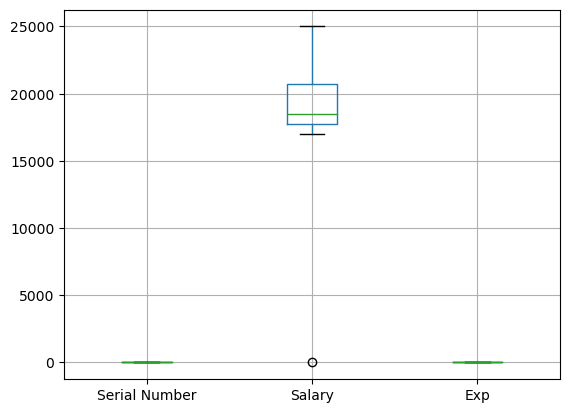

In [29]:
df.boxplot()

In [31]:
## IQR method
Q3= df['Salary'].quantile(0.75)
Q1= df['Salary'].quantile(0.25)
IQR= Q3-Q1
Lower_Extreme= Q1-1.5*IQR
Upper_Extreme= Q3+1.5*IQR

In [32]:
Lower_Extreme

13250.0

In [33]:
Upper_Extreme

25250.0

In [34]:
df[(df.Salary<Lower_Extreme) | (df.Salary>Upper_Extreme)]

,Serial Number,Title,Salary,Qualification,Exp
7,8,UX/UI Developer,23.0,Bachelors,0


In [39]:
df_no_outliers= df[(df.Salary>=Lower_Extreme) & (df.Salary<=Upper_Extreme)]

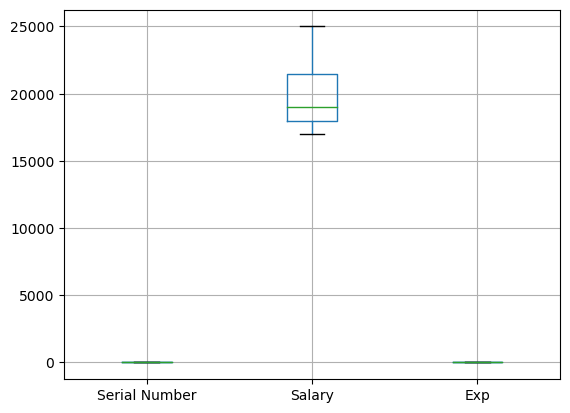

In [40]:
df_no_outliers.boxplot()
plt.show()

In [41]:
df_no_outliers

,Serial Number,Title,Salary,Qualification,Exp
0,1,Software Engineer,20000.0,Bachelors,3
1,2,Data Scientist,23000.0,Masters,4
2,3,Project Manager,18000.0,Masters,2
3,4,Professor,25000.0,Bachelors,5
4,5,Database Architect,17000.0,Bachelors,1
6,7,Business Analyst,18000.0,Bachelors,5
8,9,Devops Engineer,19000.0,Masters,2


In [42]:
## Z-score method
import scipy.stats as stats

In [52]:
def outlier_remove_z_score(df,columns):
    thershold= 2
    z_score= stats.zscore(df[columns])
    return df[(abs(z_score)<thershold).all(axis=1)]

In [53]:
df_new=outlier_remove_z_score(df,['Serial Number','Salary','Exp'])

In [54]:
df_new

,Serial Number,Title,Salary,Qualification,Exp
0,1,Software Engineer,20000.0,Bachelors,3
1,2,Data Scientist,23000.0,Masters,4
2,3,Project Manager,18000.0,Masters,2
3,4,Professor,25000.0,Bachelors,5
4,5,Database Architect,17000.0,Bachelors,1
6,7,Business Analyst,18000.0,Bachelors,5
8,9,Devops Engineer,19000.0,Masters,2


In [55]:
## correlation

In [57]:
corr=df[['Serial Number','Salary','Exp']].corr()
corr

,Serial Number,Salary,Exp
Serial Number,1.000000,-0.523317,-0.329334
Salary,-0.523317,1.000000,0.751163
Exp,-0.329334,0.751163,1.000000


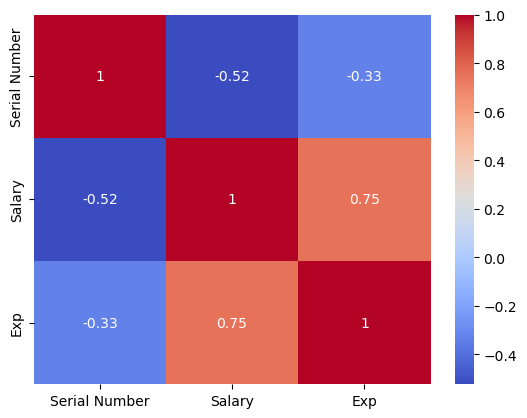

In [60]:
import seaborn as sns
sns.heatmap(corr,annot=True, cmap= plt.cm.coolwarm)
plt.show()